### Compare the performance of several asset classes
You can easily compare several time series by normalizing their starting points to 100, and plot the result.

To broaden your perspective on financial markets, let's compare four key assets: stocks, bonds, gold, and oil.

In [2]:
#libraries
import pandas as pd 
from datetime import datetime #To manually create dates
import matplotlib.pyplot as plt

In [3]:
#Import 'asset_classes.csv', using .read_csv() to parse dates in the 'DATE' column and set this column as the index,
#then assign the result to prices
prices = pd.read_csv('datasets/Stock_data-/asset_classes.csv', parse_dates=['DATE'], index_col='DATE')

# Inspect prices 
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB


In [4]:
prices.head()

,SP500,Bonds,Gold,Oil
DATE,,,,
2007-06-29,1503.35,402.15,648.50,70.47
2007-07-02,1519.43,402.96,650.50,71.11
2007-07-03,1524.87,402.02,657.25,71.41
2007-07-05,1525.40,400.15,655.90,71.81
2007-07-06,1530.44,399.31,647.75,72.80


In [5]:
#Select the first price for each series using .iloc[0] on prices and assign the result to first_prices
first_prices=prices.iloc[0]

first_prices

SP500    1503.35
Bonds     402.15
Gold      648.50
Oil        70.47
Name: 2007-06-29 00:00:00, dtype: float64

In [6]:
#Divide prices by first_prices, multiply by 100 and assign the result to normalized.
normalized = prices.div(first_prices).mul(100)
normalized.head()

,SP500,Bonds,Gold,Oil
DATE,,,,
2007-06-29,100.000000,100.000000,100.000000,100.000000
2007-07-02,101.069611,100.201417,100.308404,100.908188
2007-07-03,101.431470,99.967674,101.349268,101.333901
2007-07-05,101.466724,99.502673,101.141095,101.901518
2007-07-06,101.801976,99.293796,99.884348,103.306372


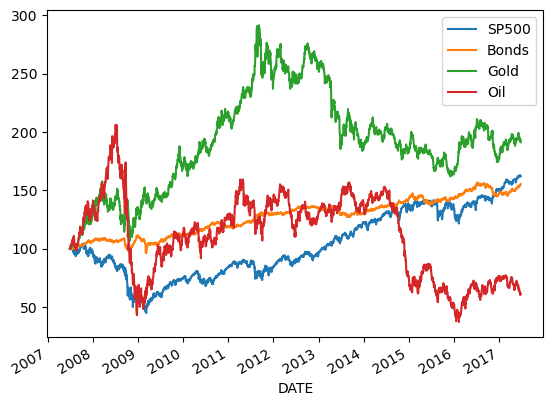

In [7]:
# Plot normalized
normalized.plot()
plt.show()

##### Comparing stock prices with a benchmark
Compare the performance of various stocks against a benchmark. Now you'll learn more about the stock market by comparing the three largest stocks on the NYSE to the Dow Jones Industrial Average, which contains the 30 largest US companies.

In [8]:
#Use pd.read_csv() to import 'nyse.csv' and 'dow_jones.csv', creating a DatetimeIndex for each from the 'date' column
#using parse_dates and index_col, and assign the result to stocks and dow_jones, respectively.

stocks = pd.read_csv('datasets/Stock_data-/nyse.csv', parse_dates=['date'], index_col='date')
dow_jones = pd.read_csv('datasets/Stock_data-/dow_jones.csv', parse_dates=['date'], index_col='date')

In [10]:
stocks.head()

,JNJ,JPM,XOM
date,,,
2010-01-04,64.68,42.85,69.15
2010-01-05,63.93,43.68,69.42
2010-01-06,64.45,43.92,70.02
2010-01-07,63.99,44.79,69.80
2010-01-08,64.21,44.68,69.52


In [11]:
dow_jones.head()

,DJIA
date,
2010-01-04,10583.96
2010-01-05,10572.02
2010-01-06,10573.68
2010-01-07,10606.86
2010-01-08,10618.19


In [12]:
#Use pd.concat() along axis=1 to combine stocks and dow_jones and assign the result to data
data = pd.concat([stocks,dow_jones],axis=1).dropna()
#inspect data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
 3   DJIA    1762 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB
None


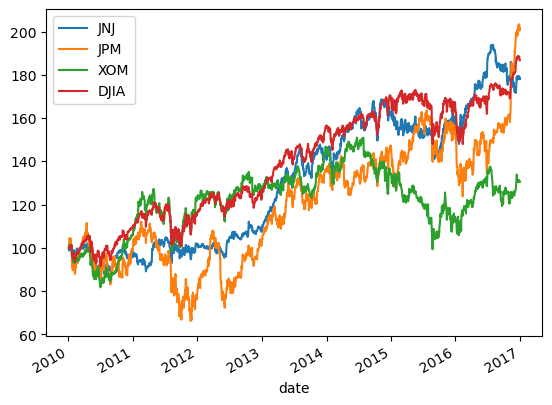

In [13]:
#Divide data by the first value for each series, multiply by 100 and plot the result.
data.div(data.iloc[0]).mul(100).plot() #normalize data
plt.show()

#### Plot performance difference vs benchmark index

We'll calculate and plot the performance difference of a stock in percentage points relative to a benchmark index.

Let's compare the performance of Microsoft (MSFT) and Apple (AAPL) to the S&P 500 over the last 10 years.

In [14]:
#Create the list tickers containing the two stock symbols
tickers = ["MSFT", "AAPL"]

In [15]:
#Use pd.read_csv() to import 'msft_aapl.csv' and 'sp500.csv', creating a DatetimeIndex for each from the 'date' column using parse_dates and index_col,
#and assign the result to stocks and sp500, respectively

stocks = pd.read_csv('datasets/Stock_data-/msft_aapl.csv',parse_dates=['date'], index_col='date')
sp500 = pd.read_csv('datasets/Stock_data-/sp500.csv',parse_dates=['date'], index_col='date')


In [16]:
stocks.head()

,AAPL,MSFT
date,,
2007-01-03,11.97,29.86
2007-01-04,12.24,29.81
2007-01-05,12.15,29.64
2007-01-08,12.21,29.93
2007-01-09,13.22,29.96


In [17]:
sp500.head()

,SP500
date,
2007-06-29,1503.35
2007-07-02,1519.43
2007-07-03,1524.87
2007-07-05,1525.40
2007-07-06,1530.44


In [19]:
#Use pd.concat() to concatenate stocks and sp500 along axis=1, apply .dropna() to drop all missing values, and assign the result to data
data = pd.concat([stocks,sp500],axis=1).dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2394 entries, 2007-06-29 to 2016-12-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2394 non-null   float64
 1   MSFT    2394 non-null   float64
 2   SP500   2394 non-null   float64
dtypes: float64(3)
memory usage: 74.8 KB


In [20]:
data.head()

,AAPL,MSFT,SP500
date,,,
2007-06-29,17.43,29.47,1503.35
2007-07-02,17.32,29.74,1519.43
2007-07-03,18.17,30.02,1524.87
2007-07-05,18.96,29.99,1525.40
2007-07-06,18.90,29.97,1530.44


In [21]:
# Normalize data by dividing by the first price, multiply by 100 and assign the output to normalized
normalized = data.div(data.iloc[0]).mul(100)
normalized.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2394 entries, 2007-06-29 to 2016-12-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2394 non-null   float64
 1   MSFT    2394 non-null   float64
 2   SP500   2394 non-null   float64
dtypes: float64(3)
memory usage: 74.8 KB


In [22]:
normalized.head()

,AAPL,MSFT,SP500
date,,,
2007-06-29,100.000000,100.000000,100.000000
2007-07-02,99.368904,100.916186,101.069611
2007-07-03,104.245554,101.866305,101.431470
2007-07-05,108.777969,101.764506,101.466724
2007-07-06,108.433735,101.696641,101.801976


In [26]:
#Select tickers from normalized, and subtract normalized['SP500'] with keyword axis=0 to align the indexes
print(normalized[tickers].sub(normalized["SP500"], axis=0).head(10))


                MSFT      AAPL
date                          
2007-06-29  0.000000  0.000000
2007-07-02 -0.153425 -1.700707
2007-07-03  0.434835  2.814084
2007-07-05  0.297782  7.311245
2007-07-06 -0.105335  6.631759
2007-07-09 -0.538454  4.931543
2007-07-10 -0.925387  8.040780
2007-07-11 -0.957178  7.466063
2007-07-12 -0.914109  6.917965
2007-07-13 -2.081717  9.639413


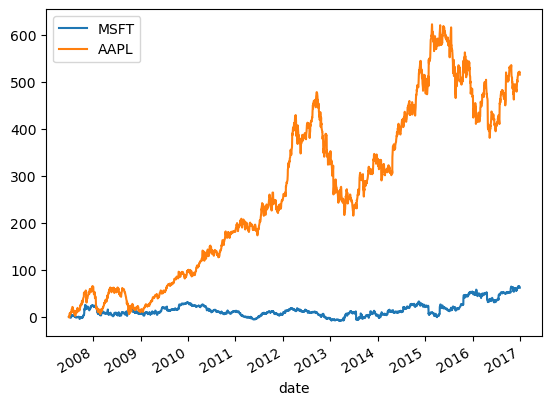

In [27]:
#then plot the result
normalized[tickers].sub(normalized["SP500"], axis=0).plot()
plt.show()

Now you can compare these stocks to the overall market so you can more easily spot trends and outliers.